In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.arima_model import ARIMA
from arch.unitroot import PhillipsPerron
import seaborn as sns
import numpy as np
from matplotlib import style 
style.use("seaborn-whitegrid")

/Users/gerardo/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
vix = pd.read_csv("VIX.csv", index_col=0)

In [4]:
vix.VIX.index[0]

'1/4/10'

In [5]:
vix.VIX.index[-1]

'5/18/17'

<IPython.core.display.Javascript object>


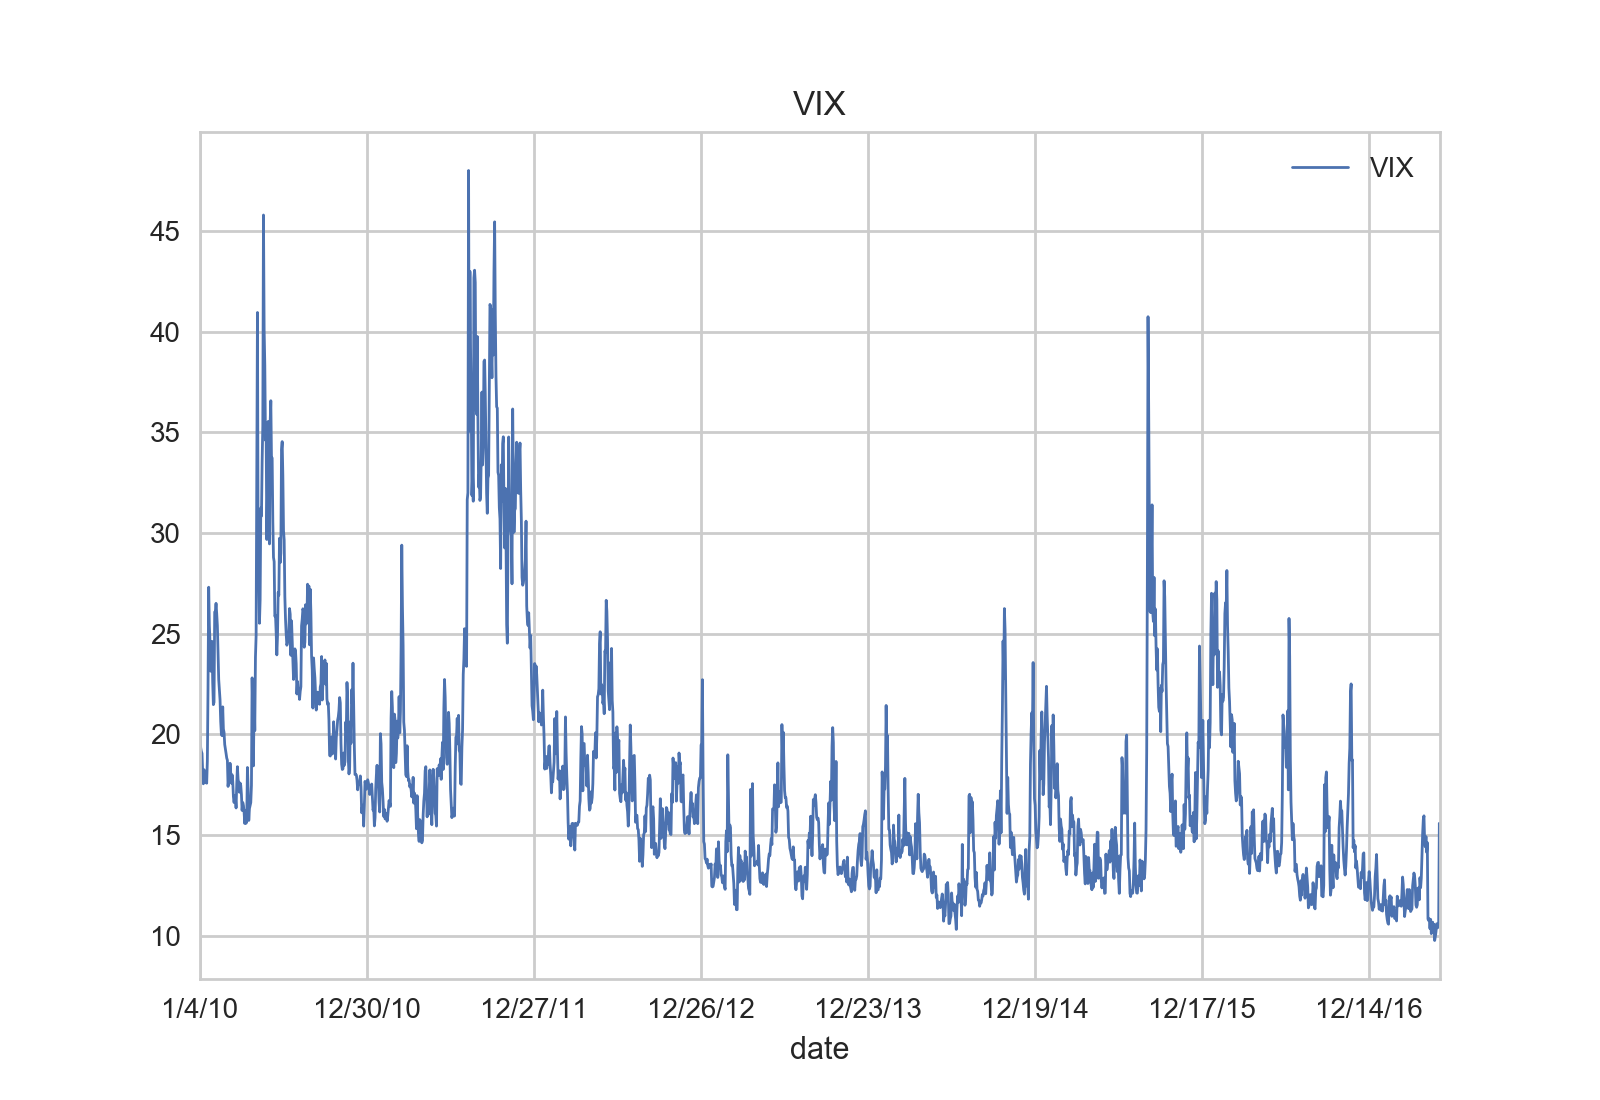

In [6]:
vix.plot(title="VIX", linewidth=1);
plt.savefig("VIX.pdf")

<IPython.core.display.Javascript object>


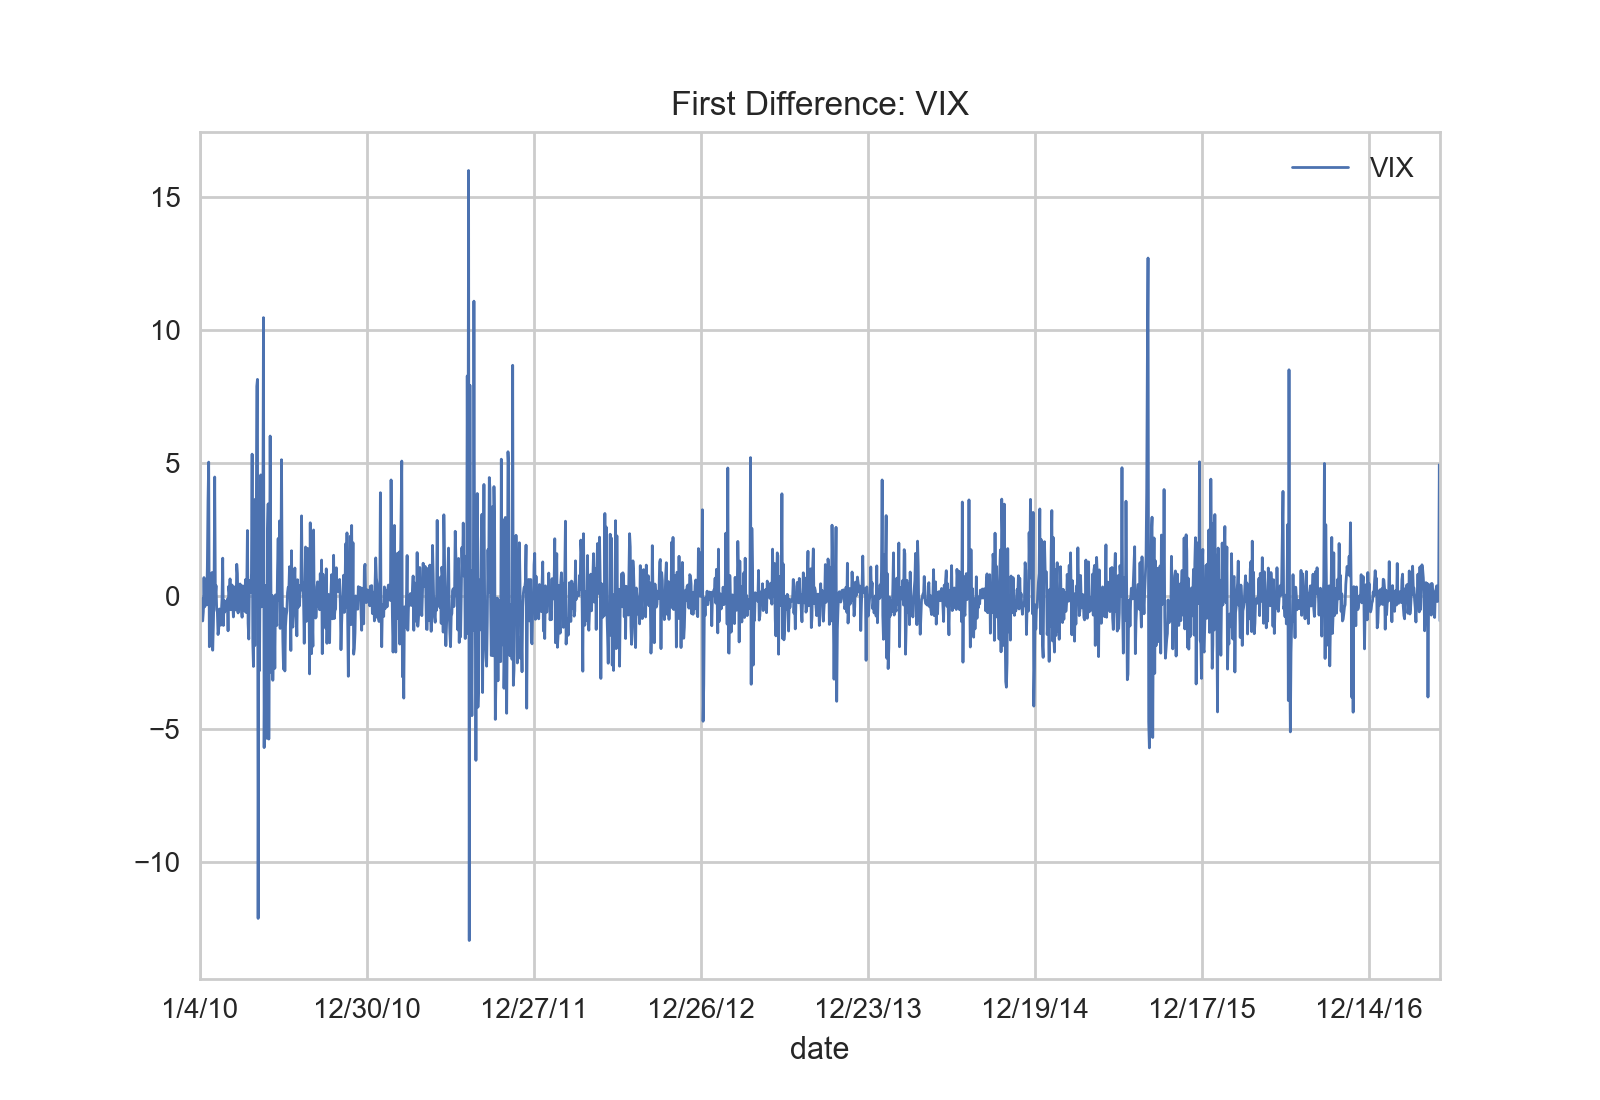

In [28]:
vix.diff(1).plot(linewidth=1)
plt.title("First Difference: VIX")
plt.savefig("./images/VIX_diff.pdf")

Since the model appears to have no trend,we may choose a difference order 0

## Unit Root Test
In this case, we use the Phillips-Perron test to assert whether the model has as unit root or not.

In [7]:
print(PhillipsPerron(vix, lags=1))

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -5.826
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


The PP test rejects the null-hypothesis, there is not a unit root. Hence there exists hints of stationarity.

We now investigate the form of the data

<IPython.core.display.Javascript object>


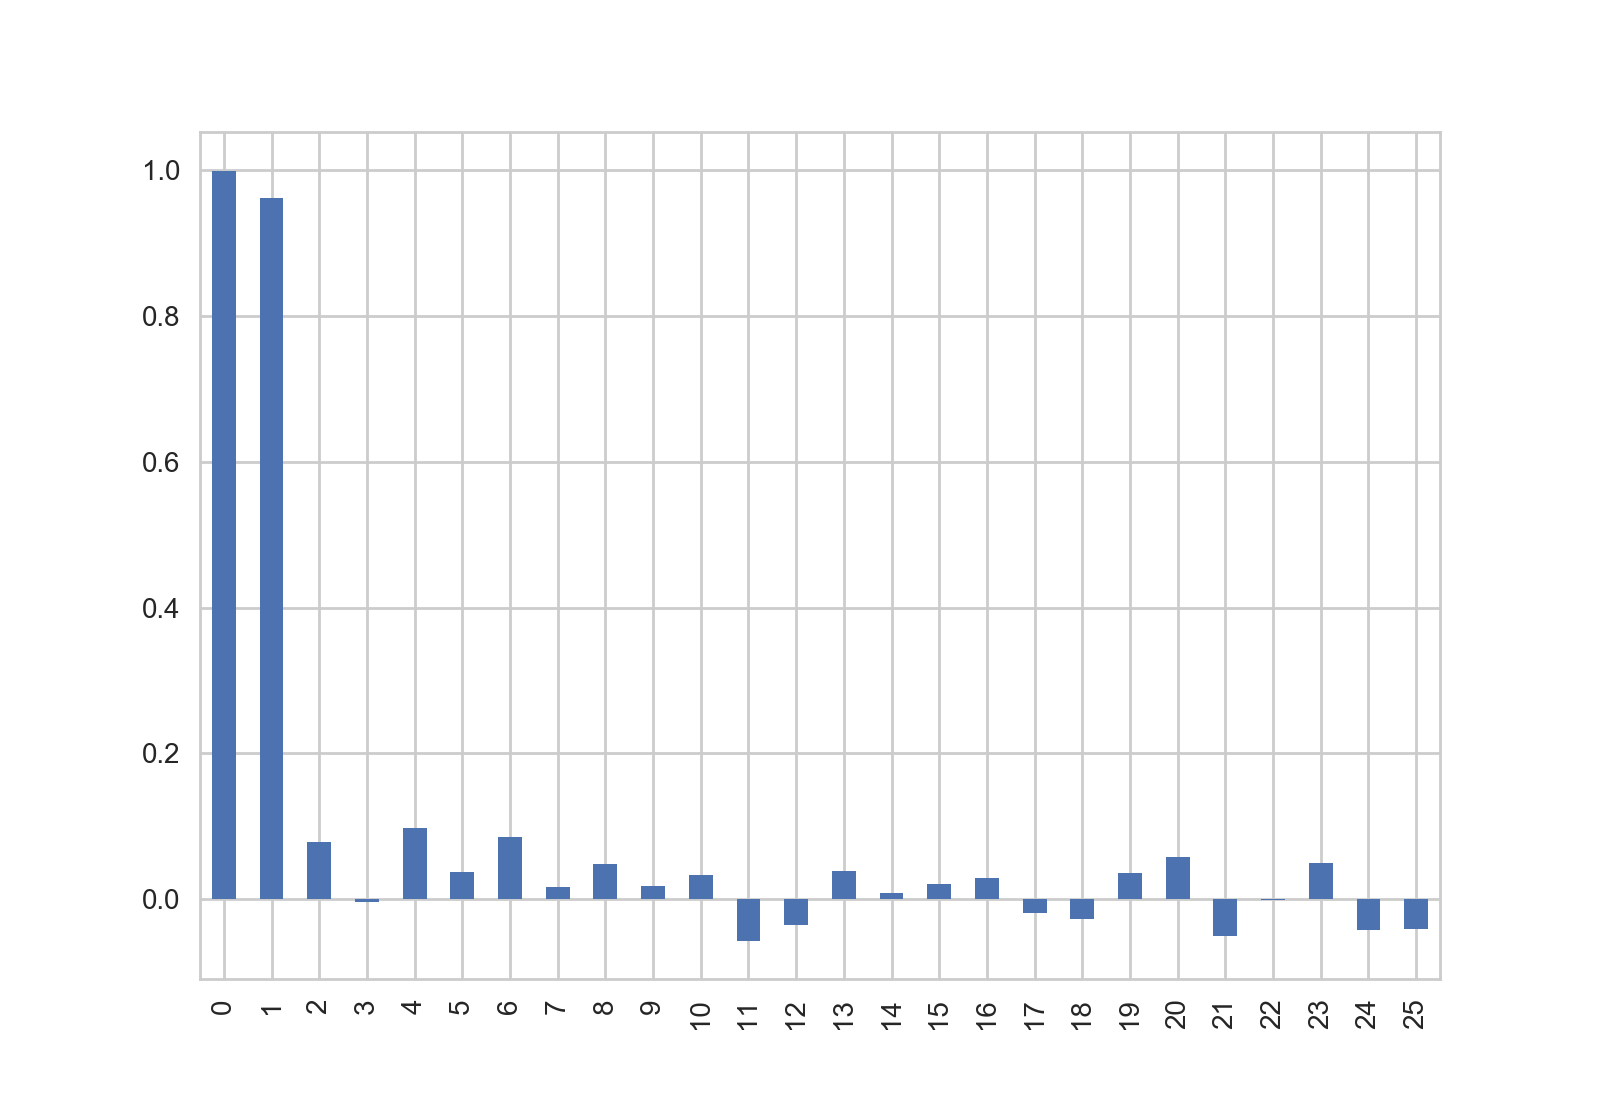

In [37]:
pd.Series(pacf(vix, nlags=25)).plot(kind="bar")
plt.savefig("./images/pacf.pdf")

<IPython.core.display.Javascript object>


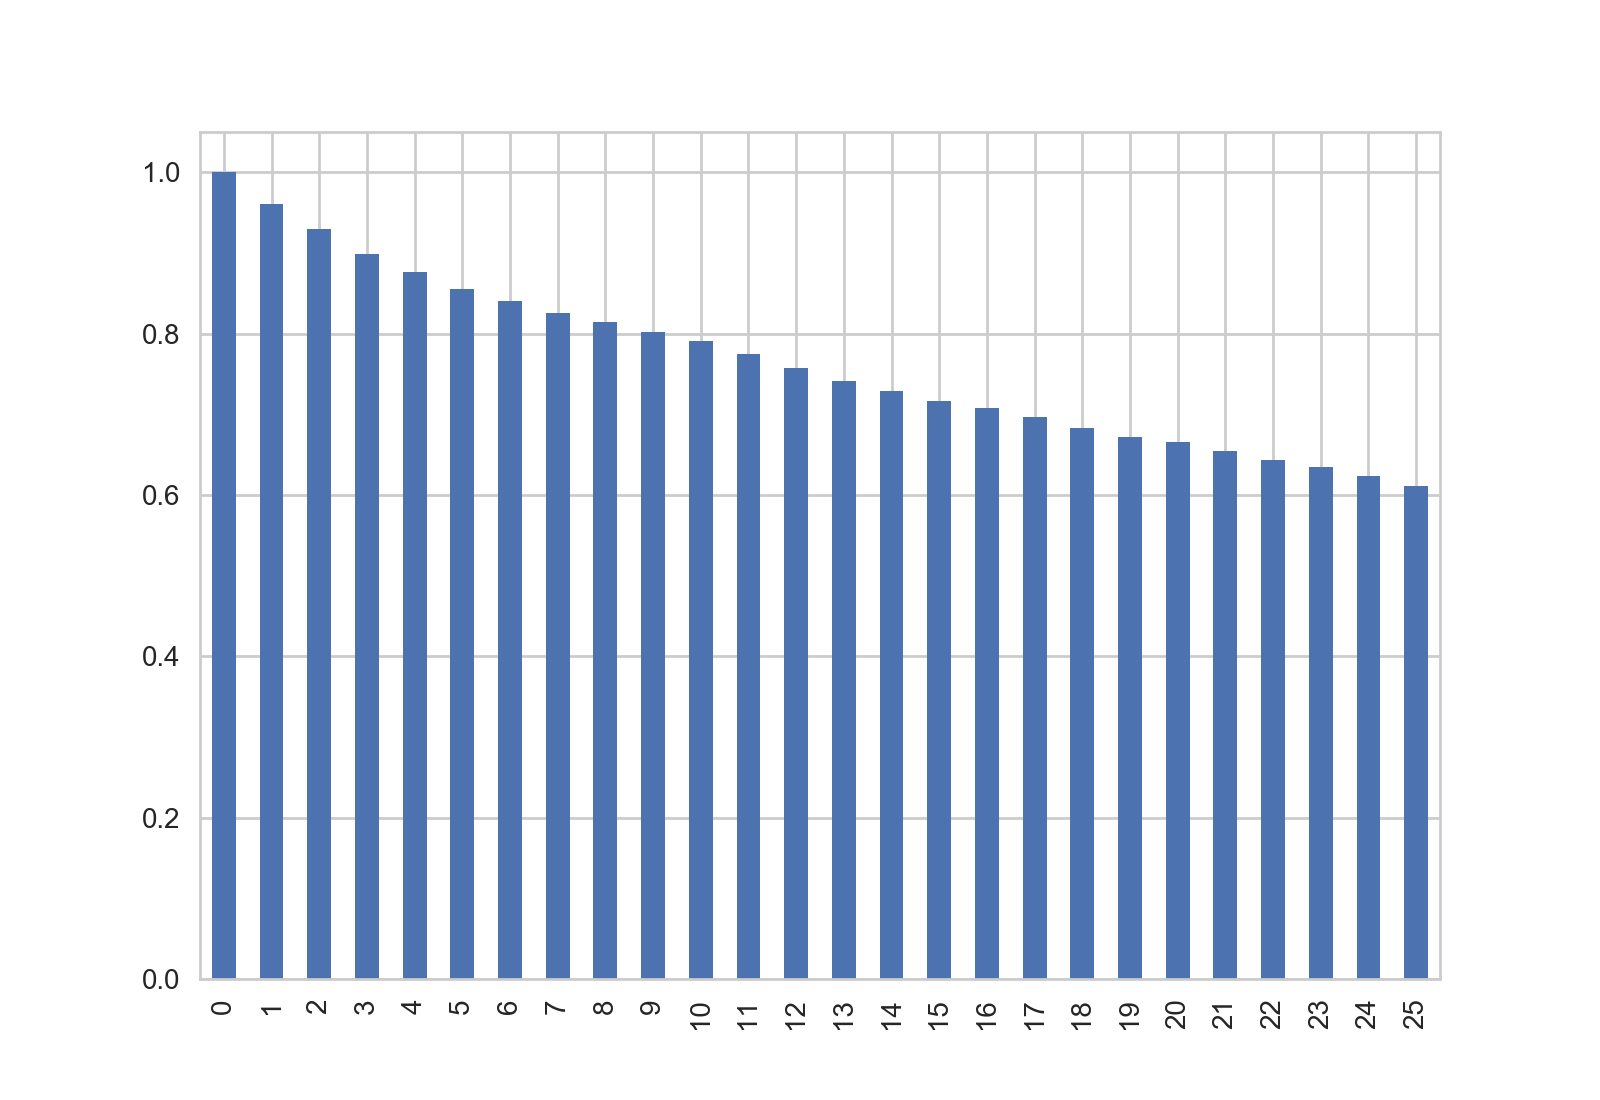

In [38]:
pd.Series(acf(vix, nlags=25)).plot(kind="bar")
plt.savefig("./images/acf.pdf")

The plots show hints of an **AR** model with degree 2. We fit this model.

In [11]:
vix_model = ARIMA(vix, (1,0,0)).fit()
print(vix_model.summary2())

                           Results: ARMA
Model:              ARMA             BIC:                 7071.1949 
Dependent Variable: VIX              Log-Likelihood:      -3524.3   
Date:               2017-05-21 20:33 Scale:               1.0000    
No. Observations:   1857             Method:              css-mle   
Df Model:           2                Sample:              01-04-2010
Df Residuals:       1855                                  05-18-2017
Converged:          1.0000           S.D. of innovations: 1.613     
AIC:                7054.6148        HQIC:                7060.726  
----------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const       17.6069     0.9448    18.6346   0.0000   15.7550   19.4587
ar.L1.VIX    0.9609     0.0064   151.2733   0.0000    0.9484    0.9733
----------------------------------------------------

Plotting the residuals of the model

<IPython.core.display.Javascript object>


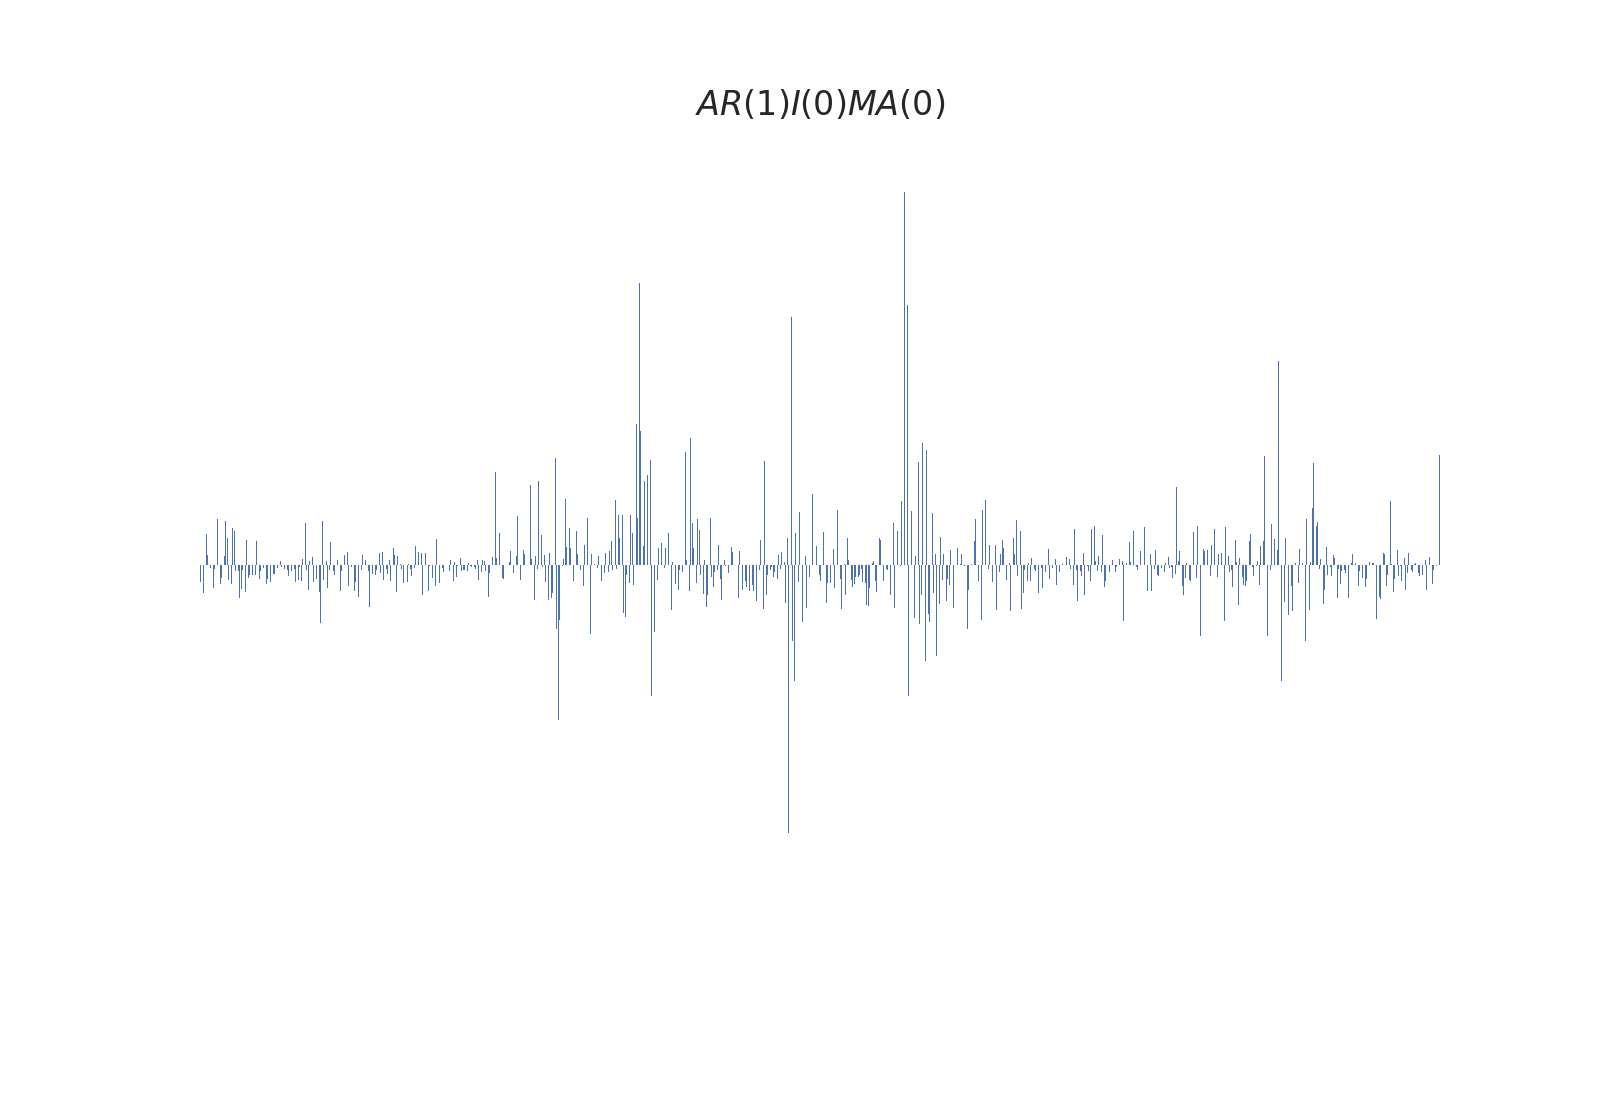

In [180]:
vix_model.resid.plot(kind="bar", xticks=[0], title="$AR(1)I(0)MA(0)$")
plt.axis("off");

In [12]:
jarque_bera(vix_model.resid)

(22716.167831541126, 0.0, 1.7644986237675953, 19.766977849369557)

<IPython.core.display.Javascript object>


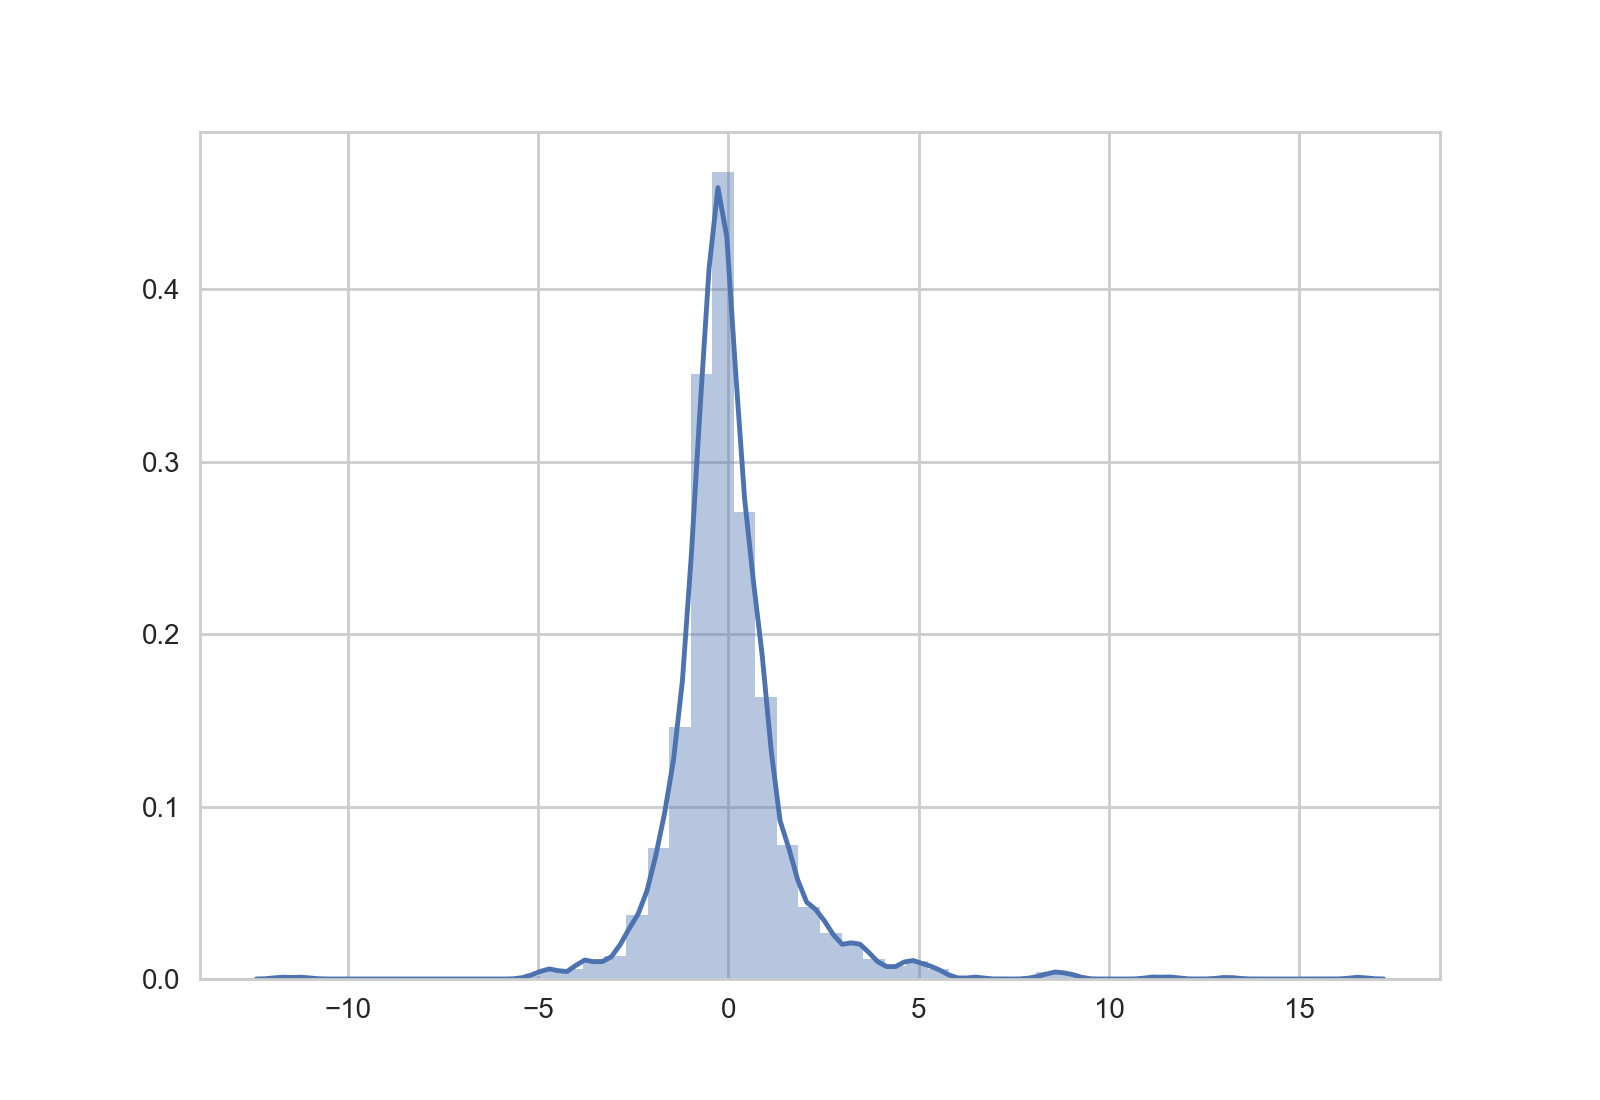

In [14]:
sns.distplot(vix_model.resid)
plt.savefig("images/resid_dist.png")

The model does not pass the JB test, nonetheless, the Platykurtic distribution hints a positive impact as a trading strategy 